# Problem 5: Python Problem

Heat generated through the biological activity of microorganisms is often temperature dependent such
that biological production is zero at temperature extremes (Tmin=15oC; Tmax=30oC) and maximized at an
optimal temperature (Topt=25oC). Imagine a spherical lump of detritus in a lake that has a diameter of
L=0.02 m and conductivity k=2W/m-K. As it moves through the water column, it loses heat by
convection, h=3.1 W/m2-K, to the surrounding water (Twater=12oC), and it generates heat through
biological activity:

### Equation:


In [62]:
import numpy as np
### Knowns:
# the temperature extremes
Tmin = 15 +273.15# K
Tmax = 30 +273.15 # K
# This is the max optimum temp
Topt = 25 +273.15 #K
Twater = 12 +273.15 #K
L = .02 #m
#diameter of the spherical lump of detrius
k = 2 # W/m-K
# conductivity of the spherical lump
h = 3.1  # W/(m^2 - K)
C_Q = .008 # K/s 
# detritus density:
density = 1000 #kg/m^3
# heat capacity of detritus
c_p = 3500 #J/kg-K

# calculated Area
Area = 4*np.pi*(L/2)**2
# print(Area)
# calculated the volume:
volume = np.pi*(4/3)*(L/2)**3
# print(volume)

# calculated the mass
mass = density * volume
# print(mass)
 

#### 5a write Q as a function of T



-0.0


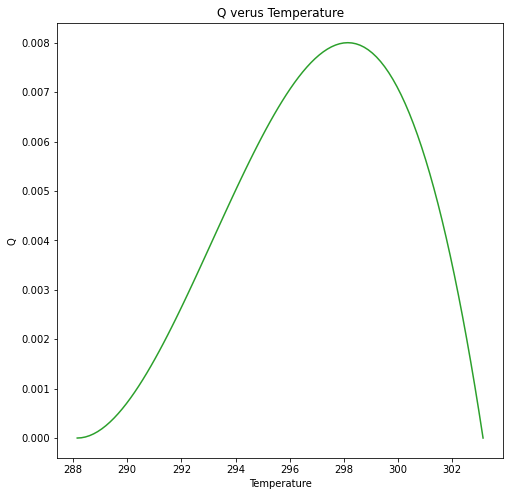

In [63]:
#CORRECT...

import numpy as np
import matplotlib.pyplot as plt
def QofT(T):
    """Function to plot Q as a function of T
    This function takes an input of T"""
    array_Q = np.empty(len(T))
    for temp in np.arange(len(T)):
        if T[temp] > Tmin or T[temp] < Tmax:
            #print(T[temp])
            Q_numerator = C_Q*(T[temp]-Tmax)*((T[temp]-Tmin)**2)
            Q_denominator = (Topt - Tmin)*((Topt-Tmin)*(T[temp]-Topt)-(Topt-Tmax)*(Topt+Tmin-2*T[temp]))
            Q_of_T =  Q_numerator/Q_denominator
            array_Q[temp] = Q_of_T
        elif Tmin >= T[temp] or T >= Tmax:
            array_Q[temp] = 0
   # print("currently testing")
    return array_Q
def plotQofT(T,ax):
    vals_Q = QofT(tarray)
    ax.plot(T, vals_Q, "tab:green")
# set an array of temperature values from Tmin to T max
tarray = np.linspace(Tmin,Tmax,100)
QofT(tarray)

# set the axis
fig = plt.figure()
fig.set_size_inches(8,8)
ax5a = plt.subplot(1,1,1)
a = QofT(tarray)
print(a[len(tarray)-1])
plotQofT(tarray, ax5a)
ax5a.set_xlabel('Temperature')
ax5a.set_ylabel('Q')
ax5a.set_title('Q verus Temperature')
plt.show()


#### 5b write dT/dt as a function of T

> In this problem it doesn't detail that the time is a factor in the change of the temperature so as such it is safe to assume that it operates under steady conditions
> However:
   * The lump **loses heat** by *convection*
   * There are reactions
      * the lump **generates heat** through reactions 
      * The reactions are zero at the temperature extremes
      

In [64]:
# if above logic is incorrect I checked to see if we could use lumped parameter
###### Checked the Biot Number to see uf we can use lumped parameter
###### Bi = (h*L)/k
Bi = (h * L) /k
if Bi < .1:
    print("Use Lumped Parameter")
else:
    print("We cannot ignore space and thus must need to account for it with a different method")

Use Lumped Parameter


Text(0.5, 1.0, 'dT/dt verus Temperature')

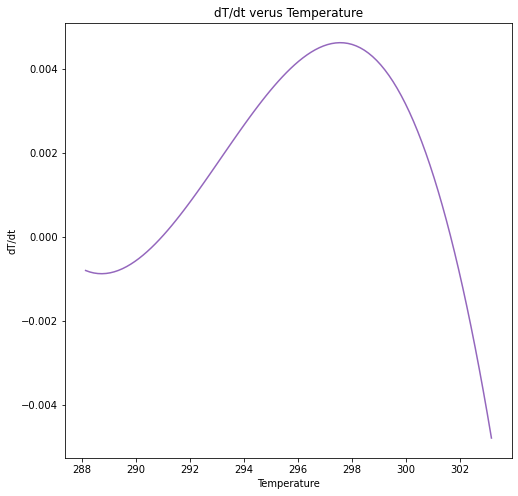

In [65]:
### Q is the heat generation for reaction term...
# Referenced the prior temp of T
tarray = np.linspace(Tmin,Tmax,100)
# Called the function QofT
dT_dt = np.empty(len(tarray))

# for temperature in np.arange(len(tarray)):
dT_dt = (-h*Area/(mass*c_p))*(tarray-Twater) + QofT(tarray)

# the plotted
fig = plt.figure()
fig.set_size_inches(8,8)
ax5b = plt.subplot(1,1,1)
ax5b.plot(tarray, dT_dt,"tab:purple")

ax5b.set_xlabel('Temperature')
ax5b.set_ylabel('dT/dt')
ax5b.set_title('dT/dt verus Temperature')

### 5c. 
> Sovle for and plot the temp as a function of time over 10 hours if initial temp of detrius is 18.5 C

Text(0.5, 1.0, 'Temperature over Time with initial temperature of 18.5 C')

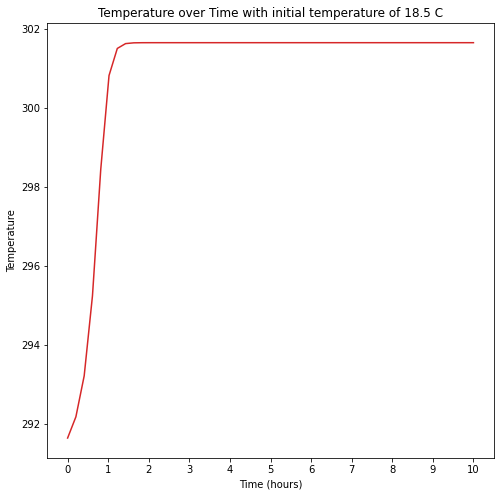

In [66]:
###
from scipy.integrate import odeint


# odeint function
## T =  variable T
## 
def Temp_Model (T,t):
    dT_dt = (-h*Area/(mass*c_p))*(T-Twater) + QofT(T)
    return dT_dt
## initial condition for temperature
init_temp =  18.5 +273.15 #K

## time interval
#init_t  = 
#final_t = 
t = np.linspace(0,10*60*60,50)
## integrate with odeint
### odeint(function, initial condition, time range)
Temp = odeint(Temp_Model, init_temp, t)
# the plotted
fig = plt.figure()
fig.set_size_inches(8,8)
ax5c = plt.subplot(1,1,1)
ax5c.plot(t, Temp, "tab:red")
ax5c.set_ylabel('Temperature')
ax5c.set_xlabel('Time (hours)')
ax5c.set_xticks([0, 3600, 7200, 10800, 14400,18000,21600,25200,28800,32400,36000])
ax5c.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10])
ax5c.set_title('Temperature over Time with initial temperature of 18.5 C')



> Result from plotting temp of detritus as function of time over 10 hours if the initial temp of detris is 16C

# 5d 
> Solve for and plot the temperature as a function of time, over 10 hours, if the initial temperature of the detritus is 16C 

Text(0.5, 1.0, 'Temperature over Time with initial temperature of 16 C')

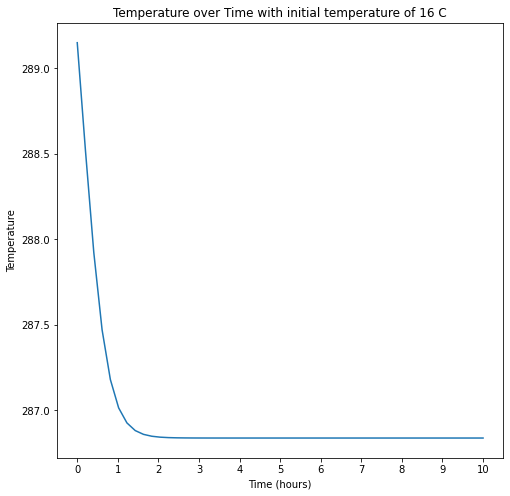

In [67]:
###
from scipy.integrate import odeint


# odeint function
## T =  variable T
## 
def Temp_Model (T,t):
    dT_dt = (-h*Area/(mass*c_p))*(T-Twater) + QofT(T)
    return dT_dt
## initial condition for temperature
init_temp =  16 +273.15 #K

## time interval
#init_t  = 
#final_t = 
t2 = np.linspace(0,10*60*60,50)
## integrate with odeint
### odeint(function, initial condition, time range)
Temp2 = odeint(Temp_Model, init_temp, t2)

# the plotted
fig = plt.figure()
fig.set_size_inches(8,8)
ax5d = plt.subplot(1,1,1)
ax5d.plot(t2, Temp2, "tab:blue")
ax5d.set_ylabel('Temperature')
ax5d.set_xlabel('Time (hours)')
ax5d.set_xticks([0, 3600, 7200, 10800, 14400,18000,21600,25200,28800,32400,36000])
ax5d.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10])
ax5d.set_title('Temperature over Time with initial temperature of 16 C')


# 5e
> What is the difference between c and d

Text(0.5, 1.0, 'Difference Between Initial Temperature of Detritus')

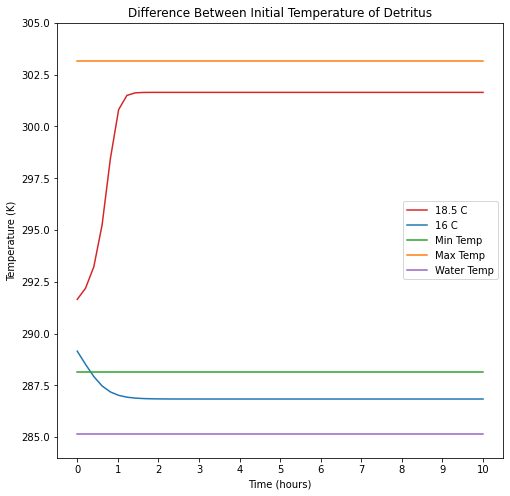

In [68]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax5e = plt.subplot(1,1,1)
ax5e.set_ylim(284,305)
ax5e.plot(t,Temp, 'tab:red', label = '18.5 C')
ax5e.plot(t2, Temp2, 'tab:blue', label = '16 C')
# plotted the Tmin and Tmax
ax5e.plot([0,36000],[Tmin,Tmin],'tab:green', label='Min Temp')
ax5e.plot([0,36000],[Tmax,Tmax],'tab:orange', label = 'Max Temp')
# plotted Twater
ax5e.plot([0,36000],[Twater,Twater],'tab:purple', label = 'Water Temp')

ax5e.legend(loc = 'center right')
ax5e.set_xlabel('Time (hours)')
ax5e.set_ylabel('Temperature (K)')
ax5e.set_xticks([0, 3600, 7200, 10800, 14400,18000,21600,25200,28800,32400,36000])
ax5e.set_xticklabels([0, 1,2,3,4,5,6,7,8,9,10])
ax5e.set_title('Difference Between Initial Temperature of Detritus')


There is a clear difference between the two inital conditions. The first initial condition of 18.5C leads to an increase in the temperature of the detritus as it is moving through the lake. Whereas with the initial temperature of the detritus at 16C leads to a decrease in temperature. The initial temperature of 16C does not induce the genertion of heat through biological activity, but the temperature of 18.5C does, up until it reaches the maximum. Based on the above plot it is clear that the increase in temperature halts around the same temperature as the maximum temperature in this system. It is known that at this temperature there is no biological activity so it is safe to make the assumption that although it has not reached the maximum temperature it has reached a high enough temperature for it to be considered extreme and thus activity ceases for the microorganisms. The detritus starting at 16C continues to lose temperature until reaches equilibrium with the surrounding fluid. This can be seen at the above plot where it is 3 degrees away from reaching the same temperature as the fluid. It is the insulative and material properties of the detritus that likely keeps it from coming into completely the same temperature as the surrounding fluid. 